## Esercizio 12.1

In questo esercizio, dopo aver riorganizzato il codice fornito a lezione, provo a migliorare le performance della rete modificando il **numero di epoche** e **l'ottimizzatore**.

Eseguo i confronti basandomi su accuratezza e loss restituite dalla fase di test.

## Inizializzazione della rete

In [69]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

# ==============================================
# 1: LOAD AND PROCESS DATA
# Download the MNIST data from the web: import 
# the `mnist` module and use `load_data()`.
# It creates (pre-defined) training and test data sets.
# ==============================================
print("============================")
print("1: LOAD AND PROCESS DATA")

from tensorflow.keras.datasets import mnist

img_rows, img_cols = 28, 28 # input image dimensions (pixels) 
num_classes = 10 # output: 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape) # l'input
print('Y_train shape:', Y_train.shape) # label, ovvero gli output
print('X_test shape:', X_test.shape) # l'input
print('Y_test shape:', Y_test.shape) # label, ovvero gli output

# ==============================================
# 1.1: REFORMAT DATA
# we need to format the data in the correct shape.
# ==============================================
print("\n============================")
print("1.1: REFORMAT DATA")

# reshaping could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('Before to_categorical: ')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# cast floats to single precision, and rescale to interval [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

# look at an example of data point
#print('An example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
#plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
#plt.show()
#print("*not showing image*")

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('After to_categorical: ')
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

# ==============================================
# 2: DEFINE dNN & ITS ARCHITECTURE
# Use only `Dense` layers, for simplicity.
# ==============================================
print("\n============================")
print("2: DEFINE dNN & ITS ARCHITECTURE")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout      

def create_DNN():
    model = Sequential()                                # instantiate model
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu')) 
                                                        # specify input shape (28x28 pixels).
                                                        # Keras SEquential Model can infer the correct input/output dimensions of other layers
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.5))                             # Dropout, spegne alcuni neuroni,
                                                        # per rendere "più difficile" l'apprendimento.
                                                        # Evita overfitting e rende più "solido" il modello
                                                        # che impara a generalizzare.
    model.add(Dense(num_classes, activation='softmax')) # Softmax in uscita per un risutlato più netto possibile
                                                        # specify output shape (10 classes).
    return model

print('Model architecture created successfully!')

# ==============================================
# 3: OPTIMIZER & LOSS(=cost) FUNCTION
# Loss: classification problem --> `cross entropy`
#      (10 classes --> `categorical cross entropy`)
# Opt.: `sgd`;
#      (parameters [https://keras.io/]: 
#       learning rate, momentum, ...)
# Metr. (to test performance): 
#       classification problem --> `accuracy`
#      (% of correctly classified data points)
# ==============================================
print("\n============================")
print("3: OPTIMIZER & LOSS FUNCTION")

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam 

opt = 'adadelta(lr1)'                                                   #  <<<<<< try at least two others different from SGD
def compile_model():
    model=create_DNN()
    model.compile(loss=keras.losses.categorical_crossentropy, # note that model uses **LOSS TO OPTIMIZE** ...
                  #optimizer=SGD(),
                  optimizer=Adadelta(learning_rate=1),
                  metrics=['acc'])                            # ... and metrics only to **TEST PERFORMANCE**
    return model

print('Model compiled successfully, ready to train.')

1: LOAD AND PROCESS DATA
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)

1.1: REFORMAT DATA
Before to_categorical: 
X_train shape: (60000, 784)
X_test shape: (10000, 784)
After to_categorical: 
X_train shape: (60000, 784)
Y_train shape: (60000, 10)

2: DEFINE dNN & ITS ARCHITECTURE
Model architecture created successfully!

3: OPTIMIZER & LOSS FUNCTION
Model compiled successfully, ready to train.


## Training del modello

In [70]:
# ==============================================
# 4: MODEL TRAINING
# "Minibatches train": shuffling training data 
# improves stability. Thus, we train over epochs:
# in each we use all train data divided in batches.
# ==============================================
print("\n============================")
print("4: MODEL TRAINING")

my_batch_size = 32
epochs = 10                                         # <<<<<<<<<<<<<<<<<<<<<<<<<<<<< use more than 5

model_DNN = compile_model() # create the dNN

# Train DNN and store training info in history
# Use the `fit()` method of the `Sequential` class
history = model_DNN.fit(X_train, Y_train,           # input and output data
                        batch_size=my_batch_size,   # optional
                        epochs=epochs,              # optional (but how can it work without?)
                        verbose=1,                  # monitoring training process
                        validation_data=(X_test, Y_test)# optional
                        )


4: MODEL TRAINING
Epoch 1/20
1875/1875 [==============================] - 38s 19ms/step - loss: 0.2917 - acc: 0.9136 - val_loss: 0.1217 - val_acc: 0.9635
Epoch 2/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1327 - acc: 0.9617 - val_loss: 0.0967 - val_acc: 0.9720
Epoch 3/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0947 - acc: 0.9738 - val_loss: 0.0840 - val_acc: 0.9745
Epoch 4/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0759 - acc: 0.9787 - val_loss: 0.0842 - val_acc: 0.9766
Epoch 5/20
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0643 - acc: 0.9817 - val_loss: 0.0806 - val_acc: 0.9787
Epoch 6/20
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0558 - acc: 0.9847 - val_loss: 0.0759 - val_acc: 0.9801
Epoch 7/20
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0491 - acc: 0.9862 - val_loss: 0.0912 - val_acc: 0.9796
Epoch 8/20
1875/1875 [=======


5: MODEL PERFORMANCE EVALUATION
313/313 [==============================] - 4s 12ms/step - loss: 0.1083 - acc: 0.9820
Test loss: 0.10831917822360992
Test accuracy: 0.9819999933242798


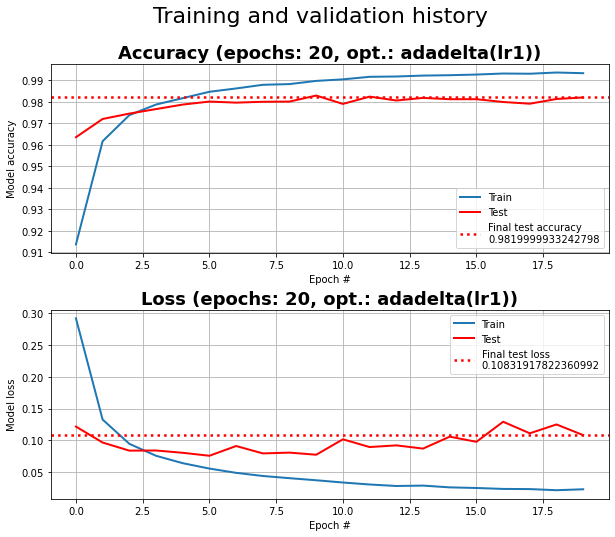


6: MODEL PREDICTIONS


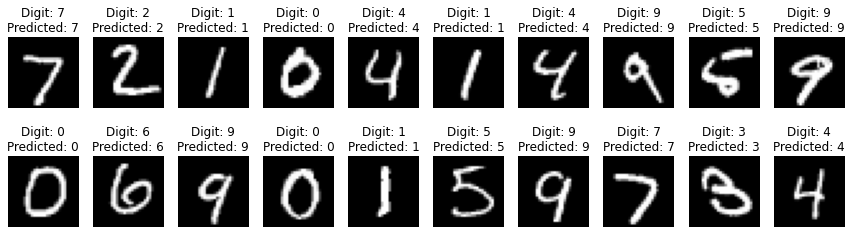

In [71]:
# ==============================================
# 5: MODEL PERFORMANCE EVALUATION
# Evaluate performance on (unseen) test data
# ==============================================
print("\n============================")
print("5: MODEL PERFORMANCE EVALUATION")

score = model_DNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# summarize history for accuracy
plt.figure(figsize=(10,8))
plt.suptitle("Training and validation history", fontsize = 22)

plt.subplot(2,1,1)
plt.plot(history.history['acc'], label = 'Train', linewidth = 2)
plt.plot(history.history['val_acc'], label = 'Test', color = 'r', linewidth = 2)
finacc = history.history['val_acc'][epochs-1]
plt.axhline(y=finacc, color = 'r', label = 'Final test accuracy\n'+str(finacc), linestyle =':', linewidth = 2.5)
title = "Accuracy (epochs: "+str(epochs)+", opt.: "+opt+")"
plt.title(title, fontsize = 18, fontweight = "bold")
plt.ylabel('Model accuracy')
plt.xlabel('Epoch #')
plt.legend(loc='best')
plt.grid()

# summarize history for loss
plt.subplot(2,1,2)
plt.plot(history.history['loss'], label = 'Train', linewidth = 2)
plt.plot(history.history['val_loss'],  label = 'Test', color ='r', linewidth = 2)
finacc = history.history['val_loss'][epochs-1]
plt.axhline(y=finacc, color = 'r', label = 'Final test loss\n'+str(finacc), linestyle = ':', linewidth = 2.5)
title = "Loss (epochs: "+str(epochs)+", opt.: "+opt+")"
plt.title(title, fontsize = 18, fontweight = "bold")
plt.ylabel('Model loss')
plt.xlabel('Epoch #')
plt.legend(loc='best')
plt.grid()

plt.subplots_adjust(hspace=0.3)
plt.savefig('imgs/1/train'+str(epochs)+opt+'.png', facecolor='white')
plt.show()

# ==============================================
# 6: MODEL PREDICTIONS
# ==============================================
print("\n============================")
print("6: MODEL PREDICTIONS")
predictions = model_DNN.predict(X_test)

x_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15,4))
for i in range(20):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(x_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 

plt.savefig('imgs/1/pred'+str(epochs)+opt+'.png', facecolor='w')
plt.show()



### Osservazione

Il *Dropout* durante il training aumenta la **robustezza del modello**, il quale viene "obbligato" a imparare a generalizzare. Questo processo viene fatto **a spese dell'*accuracy***. Durante il test invece il *Dropout* viene **disattivato**, e permette alla rete di usare anche i neuroni meno significativi (*weak classifiers*). Per questo motivo solitamente l'**accuratezza del test è maggiore** di quella di training.


## Confronti



Usando **5 epoche e lo Stocastic Gradient Descent** `sgd` come ottimizzatore, loss e accuracy non arrivano a convergere, quindi il modello può ancora essere allenato per calibrare meglio i parametri. Osservando la capacità predittiva del modello, ho visto ad esempio che il numero $5$ (secondo da destra in alto), scritto male viene scambiato per un 6. Per il resto in verità il modello svolge già discretamente bene le predizioni (ad esempio il $3$ in basso a destra poteva non essere facilissimo da riconoscere).    
<img src="imgs/1/train5sgd.png" width="500"/>  
<img src="imgs/1/pred5sgd.png" width="500"/>


Usando **10 epoche e tenendo lo stesso ottimizzatore**, loss e accuracy non arrivano ancora a convergere bene, quindi il modello può essere ulteriormente allenato per calibrare meglio i parametri. Anche in questo caso lo stesso $5$ di prima viene scambiato per un 6.  
<img src="imgs/1/train10sgd.png" width="500"/>  
<img src="imgs/1/pred10sgd.png" width="500"/>

Usando **20 epoche e lo stesso ottimizzatore**, loss e accuracy convergono abbastanza bene, anche se c'è ancora probabilmente un margine di miglioramento. Osservando la capacità predittiva del modello, ho visto che il solito $5$ viene adesso riconosciuto.  
<img src="imgs/1/train20sgd.png" width="500"/>  
<img src="imgs/1/pred20sgd.png" width="500"/>

Ho provato allora a modificare l'ottimizzatore, tornando a 10 epoche.  
Usando la Root Mean Square Propagation `rmsprop` come ottimizzatore, il training è molto più lento, e il risultato è un po' più difficile da interpretare: l'accuratezza è buona (paragonabile a 20 epoche con l'SGD), mentre la loss tende ad aumentare al crescere delle epoche e alla fine risulta maggiore di tutte le prove fatte in precedenza. Deduco da queste osservazioni che l'RMSprop sia un ottimizzatore più "severo" dell'SGD, perciò benché la misura della loss sembri suggerire una cattiva calibrazione, tuttavia il modello risulta abile nelle predizioni.  
<img src="imgs/1/train10rmsprop.png" width="500"/>  
<img src="imgs/1/pred10rmsprop.png" width="500"/>

Usando la `Adadelta` come ottimizzatore, con i parametri di default, la capacità predittiva del modello alla fine del training è scarsa, e dai grafici si vede subito che non abbiamo lasciato al modello abbastanza tempo per calibrarsi.  
<img src="imgs/1/train10adadelta.png" width="500"/>  
<img src="imgs/1/pred10adadelta.png" width="500"/>

Nella documentazione di `adadelta` ho trovato che conviene settare il `learning_rate` a $1$ per un utilizzo efficace di questo ottimizzatore, quindi prima di provare ad aumentare le epoche ho provato a impostare questo parametro come suggerito, e il risultato è stato decisamente soddisfacente: l'accuratezza delle predizioni è la migliore tra tutte quelle finora trovate, e la loss è seconda (di poco)... ma ho usato solo la metà delle epoche rispetto al caso migliore!  
<img src="imgs/1/train10adadelta(lr1).png" width="500"/>  
<img src="imgs/1/pred10adadelta(lr1).png" width="500"/>

Ripeto allora infine il training con
- **optimizer**: `Adadelta(learning_rate=1)`
- **numero di epoche**: $20$  

Il risultato non è realmente migliore del precedente (ho finito per overfittare i dati di training, infatti la test loss è in salita nella seconda metà del grafico), quindi scelgo come impostazioni finali quelle di prima.  
<img src="imgs/1/train20adadelta(lr1).png" width="500"/>  
<img src="imgs/1/pred20adadelta(lr1).png" width="500"/>
